# Predicting Solar Panel Counts with County Data

**Developed by: JC Dy & Wilson Wang**

In this project, we will be working with a number of different datasets. The first we examine is a dataset of education by county....

In [99]:
import pandas as pd
import numpy as np
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns

## Solar Panel Dataset

We will first load the solar panel data set, which was obtained from the Google Project Sunroof. We begin by cleaning the dataset and checking for repeated, missing, or unneeded values and information, and then explore and visualize the data to assist with feature engineering for our model.

In [183]:
sunroof = pd.read_csv("data/sunroofByCounty.csv")
sunroof.head()

,region_name,state_name,lat_max,lat_min,lng_max,lng_min,lat_avg,lng_avg,yearly_sunlight_kwh_kw_threshold_avg,count_qualified,...,yearly_sunlight_kwh_n,yearly_sunlight_kwh_s,yearly_sunlight_kwh_e,yearly_sunlight_kwh_w,yearly_sunlight_kwh_f,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,install_size_kw_buckets_json,carbon_offset_metric_tons,existing_installs_count
0,Acadia Parish,Louisiana,30.480765,30.054137,-92.141898,-92.629793,30.280735,-92.355786,1087.15,362,...,9.995661e+05,2.387640e+06,1.415127e+06,1.684958e+06,5.161133e+06,18009.16406,1.164842e+07,"[[0,62],[5,66],[10,60],[15,59],[20,39],[25,19]...",7.793978e+03,0
1,Ada County,Idaho,43.805558,43.146687,-115.998789,-116.513522,43.613109,-116.311757,1156.85,133939,...,5.387239e+07,1.055632e+09,4.744878e+08,7.089204e+08,1.092363e+09,16967.80168,3.385276e+09,"[[0,12980],[5,32607],[10,38390],[15,24736],[20...",9.001732e+05,333
2,Adams County,Colorado,40.000733,39.738577,-103.723147,-105.052979,39.879419,-104.918298,1246.10,117401,...,1.826940e+07,7.158716e+08,3.635472e+08,4.020793e+08,1.415979e+09,11325.30869,2.915746e+09,"[[0,24956],[5,49920],[10,23209],[15,8129],[20,...",1.775350e+06,2223
3,Adams County,Pennsylvania,40.068780,39.720016,-76.957161,-77.464169,39.846871,-77.150441,997.05,4500,...,4.286321e+06,2.210173e+07,2.234452e+07,1.889155e+07,3.672815e+07,12304.57323,1.043523e+08,"[[0,795],[5,1343],[10,877],[15,594],[20,305],[...",6.631176e+04,0
4,Aiken County,South Carolina,33.871800,33.201889,-81.193502,-82.007226,33.526341,-81.764460,1093.95,49051,...,8.508118e+07,3.292865e+08,1.973077e+08,2.153019e+08,3.459476e+08,15336.44904,1.172925e+09,"[[0,5920],[5,12846],[10,12402],[15,8113],[20,4...",6.885615e+05,83


In [184]:
sunroof.columns

Index(['region_name', 'state_name', 'lat_max', 'lat_min', 'lng_max', 'lng_min',
       'lat_avg', 'lng_avg', 'yearly_sunlight_kwh_kw_threshold_avg',
       'count_qualified', 'percent_covered', 'percent_qualified',
       'number_of_panels_n', 'number_of_panels_s', 'number_of_panels_e',
       'number_of_panels_w', 'number_of_panels_f', 'number_of_panels_median',
       'number_of_panels_total', 'kw_median', 'kw_total',
       'yearly_sunlight_kwh_n', 'yearly_sunlight_kwh_s',
       'yearly_sunlight_kwh_e', 'yearly_sunlight_kwh_w',
       'yearly_sunlight_kwh_f', 'yearly_sunlight_kwh_median',
       'yearly_sunlight_kwh_total', 'install_size_kw_buckets_json',
       'carbon_offset_metric_tons', 'existing_installs_count'],
      dtype='object')

## Cleaning the Solar Panel Dataset

Among the columns available to us, we choose to retain only the columns containing data useful to us when constructing our machine learning prediction model.
We must keep the state_name and County (region_name) columns, and choose to retain only the 2012-2016 education data:

In [185]:
sunroof = sunroof.loc[:,['region_name', 'state_name', 'count_qualified', 'yearly_sunlight_kwh_kw_threshold_avg',
               'percent_covered', 'percent_qualified',
               'number_of_panels_n', 'number_of_panels_s', 'number_of_panels_e',
               'number_of_panels_w', 'number_of_panels_f', 'number_of_panels_median',
               'number_of_panels_total', 'kw_median', 'kw_total',
               'yearly_sunlight_kwh_n', 'yearly_sunlight_kwh_s',
               'yearly_sunlight_kwh_e', 'yearly_sunlight_kwh_w',
               'yearly_sunlight_kwh_f', 'yearly_sunlight_kwh_median',
               'yearly_sunlight_kwh_total', 'install_size_kw_buckets_json',
               'carbon_offset_metric_tons', 'existing_installs_count']]

In [186]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

In [187]:
sunroof['State'] = sunroof.apply(lambda row : us_state_abbrev[row['state_name']], axis=1)

In [188]:
sunroof.head()

,region_name,state_name,count_qualified,yearly_sunlight_kwh_kw_threshold_avg,percent_covered,percent_qualified,number_of_panels_n,number_of_panels_s,number_of_panels_e,number_of_panels_w,...,yearly_sunlight_kwh_s,yearly_sunlight_kwh_e,yearly_sunlight_kwh_w,yearly_sunlight_kwh_f,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,install_size_kw_buckets_json,carbon_offset_metric_tons,existing_installs_count,State
0,Acadia Parish,Louisiana,362,1087.15,1.295852,81.715576,3474,6970,4533,5398,...,2.387640e+06,1.415127e+06,1.684958e+06,5.161133e+06,18009.16406,1.164842e+07,"[[0,62],[5,66],[10,60],[15,59],[20,39],[25,19]...",7.793978e+03,0,LA
1,Ada County,Idaho,133939,1156.85,86.156364,90.224992,183489,2932039,1517496,2190037,...,1.055632e+09,4.744878e+08,7.089204e+08,1.092363e+09,16967.80168,3.385276e+09,"[[0,12980],[5,32607],[10,38390],[15,24736],[20...",9.001732e+05,333,ID
2,Adams County,Colorado,117401,1246.10,92.906285,87.461913,58739,1859313,1050680,1205016,...,7.158716e+08,3.635472e+08,4.020793e+08,1.415979e+09,11325.30869,2.915746e+09,"[[0,24956],[5,49920],[10,23209],[15,8129],[20,...",1.775350e+06,2223,CO
3,Adams County,Pennsylvania,4500,997.05,17.958957,87.006961,16651,70798,78169,68634,...,2.210173e+07,2.234452e+07,1.889155e+07,3.672815e+07,12304.57323,1.043523e+08,"[[0,795],[5,1343],[10,877],[15,594],[20,305],[...",6.631176e+04,0,PA
4,Aiken County,South Carolina,49051,1093.95,68.372367,86.296622,297265,984740,645255,693428,...,3.292865e+08,1.973077e+08,2.153019e+08,3.459476e+08,15336.44904,1.172925e+09,"[[0,5920],[5,12846],[10,12402],[15,8113],[20,4...",6.885615e+05,83,SC


## Education Dataset

We will first load the education data set, which was obtained from the Census Bureau, containing data from 1970, 1980, 1990, 2000, and 2012-2016. We begin by cleaning the dataset and checking for repeated, missing, or unneeded values and information, and then explore and visualize the data to assist with feature engineering for our model.

In [189]:
education = pd.read_csv("data/educationByCounty.csv")
education.head()

,FIPS Code,State,Area name,2003 Rural-urban Continuum Code,2003 Urban Influence Code,2013 Rural-urban Continuum Code,2013 Urban Influence Code,"Less than a high school diploma, 1970","High school diploma only, 1970","Some college (1-3 years), 1970",...,"Percent of adults with a bachelor's degree or higher, 2000","Less than a high school diploma, 2012-2016","High school diploma only, 2012-2016","Some college or associate's degree, 2012-2016","Bachelor's degree or higher, 2012-2016","Percent of adults with less than a high school diploma, 2012-2016","Percent of adults with a high school diploma only, 2012-2016","Percent of adults completing some college or associate's degree, 2012-2016","Percent of adults with a bachelor's degree or higher, 2012-2016",Unnamed: 47
0,0.0,US,United States,NaN,NaN,NaN,NaN,"52,373,312","34,158,051","11,650,730",...,24.4,"27,818,380","58,820,411","62,242,569","64,767,787",13.0,27.5,29.1,30.3,NaN
1,1000.0,AL,Alabama,NaN,NaN,NaN,NaN,"1,062,306","468,269","136,287",...,19.0,"496,036","1,009,593","972,703","783,076",15.2,31.0,29.8,24.0,NaN
2,1001.0,AL,Autauga County,2.0,2.0,2.0,2.0,"6,611","3,757",933,...,18.0,"4,528","12,519","10,451","8,968",12.4,34.3,28.7,24.6,NaN
3,1003.0,AL,Baldwin County,4.0,5.0,3.0,2.0,"18,726","8,426","2,334",...,23.1,"13,956","40,154","44,486","41,350",10.0,28.7,31.8,29.5,NaN
4,1005.0,AL,Barbour County,6.0,6.0,6.0,6.0,"8,120","2,242",581,...,10.9,"4,824","6,422","4,775","2,366",26.2,34.9,26.0,12.9,NaN


In [190]:
education.columns

Index(['FIPS Code', 'State', 'Area name', '2003 Rural-urban Continuum Code',
       '2003 Urban Influence Code', '2013 Rural-urban Continuum Code',
       '2013 Urban Influence Code', 'Less than a high school diploma, 1970',
       'High school diploma only, 1970', 'Some college (1-3 years), 1970',
       'Four years of college or higher, 1970',
       'Percent of adults with less than a high school diploma, 1970',
       'Percent of adults with a high school diploma only, 1970',
       'Percent of adults completing some college (1-3 years), 1970',
       'Percent of adults completing four years of college or higher, 1970',
       'Less than a high school diploma, 1980',
       'High school diploma only, 1980', 'Some college (1-3 years), 1980',
       'Four years of college or higher, 1980',
       'Percent of adults with less than a high school diploma, 1980',
       'Percent of adults with a high school diploma only, 1980',
       'Percent of adults completing some college (1-3 years

## Cleaning the Education Dataset

Notice that we have columns containing extraneous information that will not be useful in building our model. We will focus on data that has been collected more recently. One reason for this is that the other datasets we will be working with have data that is generally 2007 and onwards. In order to ensure accuracy for our predictions, we filter out the outdated data from our dataset.

We must keep the State and County (Area name) columns, and choose to retain only the 2012-2016 education data:

In [191]:
education = education.loc[:,['State', 'Area name','Less than a high school diploma, 2012-2016',
                   'High school diploma only, 2012-2016',
                   "Some college or associate's degree, 2012-2016",
                   "Bachelor's degree or higher, 2012-2016",
                   'Percent of adults with less than a high school diploma, 2012-2016',
                   'Percent of adults with a high school diploma only, 2012-2016',
                   "Percent of adults completing some college or associate's degree, 2012-2016",
                   "Percent of adults with a bachelor's degree or higher, 2012-2016"]]

In [192]:
education.head()

,State,Area name,"Less than a high school diploma, 2012-2016","High school diploma only, 2012-2016","Some college or associate's degree, 2012-2016","Bachelor's degree or higher, 2012-2016","Percent of adults with less than a high school diploma, 2012-2016","Percent of adults with a high school diploma only, 2012-2016","Percent of adults completing some college or associate's degree, 2012-2016","Percent of adults with a bachelor's degree or higher, 2012-2016"
0,US,United States,"27,818,380","58,820,411","62,242,569","64,767,787",13.0,27.5,29.1,30.3
1,AL,Alabama,"496,036","1,009,593","972,703","783,076",15.2,31.0,29.8,24.0
2,AL,Autauga County,"4,528","12,519","10,451","8,968",12.4,34.3,28.7,24.6
3,AL,Baldwin County,"13,956","40,154","44,486","41,350",10.0,28.7,31.8,29.5
4,AL,Barbour County,"4,824","6,422","4,775","2,366",26.2,34.9,26.0,12.9


In [193]:
# Which states have the most county education data?
education.groupby('State').agg('count').sort_values(by='Area name', ascending=False).head()

,Area name,"Less than a high school diploma, 2012-2016","High school diploma only, 2012-2016","Some college or associate's degree, 2012-2016","Bachelor's degree or higher, 2012-2016","Percent of adults with less than a high school diploma, 2012-2016","Percent of adults with a high school diploma only, 2012-2016","Percent of adults completing some college or associate's degree, 2012-2016","Percent of adults with a bachelor's degree or higher, 2012-2016"
State,,,,,,,,,
TX,255,255,255,255,255,255,255,255,255
GA,160,160,160,160,160,160,160,160,160
VA,136,134,134,134,134,134,134,134,134
KY,121,121,121,121,121,121,121,121,121
MO,116,116,116,116,116,116,116,116,116


In [194]:
# From above, we know the top states we have most data on
top_states = ['TX', 'GA', 'VA', 'KY', 'MO']

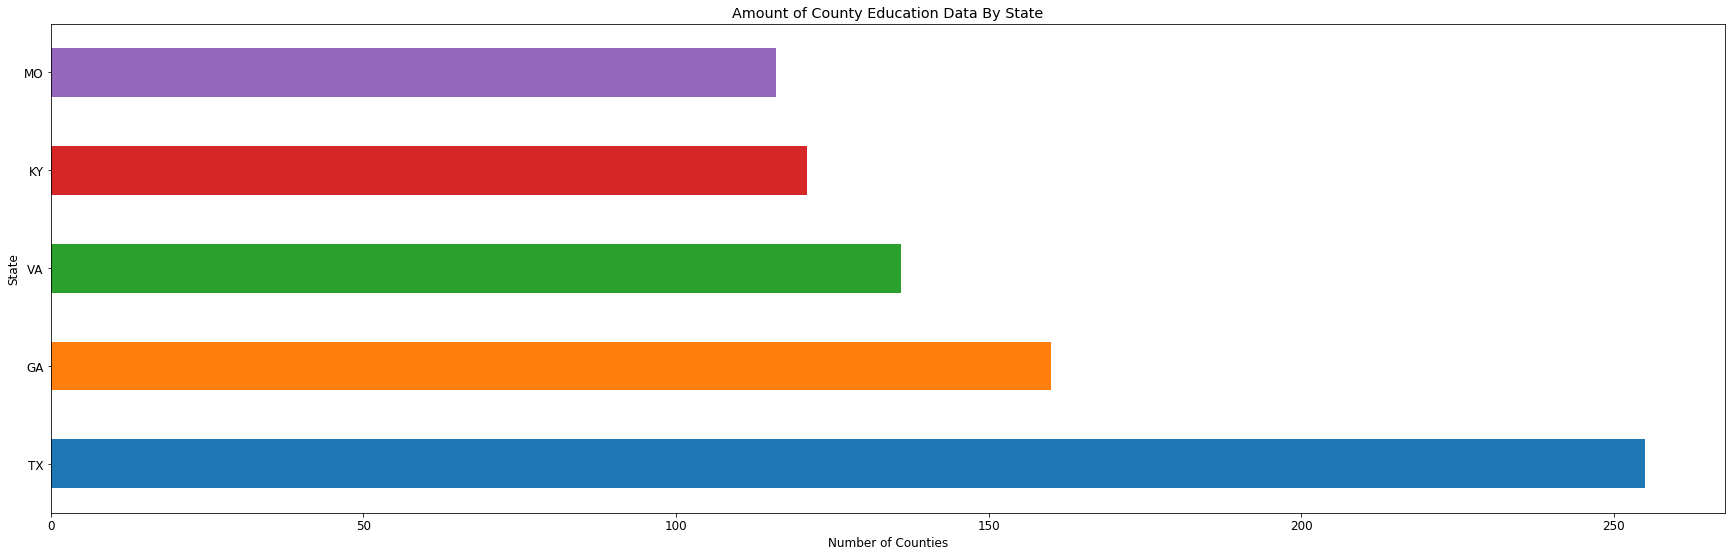

In [195]:
plt.figure(figsize=(30,9))
ax = education[education['State'].isin(top_states)]['State'].value_counts().plot(kind='barh')
ax.set_ylabel("State")
ax.set_xlabel("Number of Counties")
ax.set_title("Amount of County Education Data By State");
plt.rcParams.update({'font.size': 30})

In [196]:
num_states = len(education.groupby(education['State']))
state_list = set(education['State'].tolist())

In [197]:
education.groupby('State').agg('mean')\
.sort_values(by="Percent of adults with a bachelor's degree or higher, 2012-2016", ascending=False).head()

,"Percent of adults with less than a high school diploma, 2012-2016","Percent of adults with a high school diploma only, 2012-2016","Percent of adults completing some college or associate's degree, 2012-2016","Percent of adults with a bachelor's degree or higher, 2012-2016"
State,,,,
DC,10.000000,18.000000,16.600000,55.400000
MA,9.140000,26.080000,25.773333,38.980000
RI,10.233333,25.416667,26.333333,38.016667
CT,9.133333,28.344444,26.344444,36.188889
NJ,11.018182,29.590909,24.104545,35.286364


In [200]:
education.head()

,State,Area name,"Less than a high school diploma, 2012-2016","High school diploma only, 2012-2016","Some college or associate's degree, 2012-2016","Bachelor's degree or higher, 2012-2016","Percent of adults with less than a high school diploma, 2012-2016","Percent of adults with a high school diploma only, 2012-2016","Percent of adults completing some college or associate's degree, 2012-2016","Percent of adults with a bachelor's degree or higher, 2012-2016"
0,US,United States,"27,818,380","58,820,411","62,242,569","64,767,787",13.0,27.5,29.1,30.3
1,AL,Alabama,"496,036","1,009,593","972,703","783,076",15.2,31.0,29.8,24.0
2,AL,Autauga County,"4,528","12,519","10,451","8,968",12.4,34.3,28.7,24.6
3,AL,Baldwin County,"13,956","40,154","44,486","41,350",10.0,28.7,31.8,29.5
4,AL,Barbour County,"4,824","6,422","4,775","2,366",26.2,34.9,26.0,12.9


## Poverty Dataset

We will first load the poverty data set, which was obtained from the Census Bureau, containing data from 2016. We begin by cleaning the dataset and checking for repeated, missing, or unneeded values and information, and then explore and visualize the data to assist with feature engineering for our model.

In [201]:
poverty = pd.read_csv("data/povertyByCounty.csv")
poverty.head()

,FIPStxt,State,Area_Name,Rural-urban_Continuum_Code_2003,Urban_Influence_Code_2003,Rural-urban_Continuum_Code_2013,Urban_Influence_Code_2013,POVALL_2016,CI90LBAll_2016,CI90UBALL_2016,...,CI90UB517P_2016,MEDHHINC_2016,CI90LBINC_2016,CI90UBINC_2016,POV05_2016,CI90LB05_2016,CI90UB05_2016,PCTPOV05_2016,CI90LB05P_2016,CI90UB05P_2016
0,0,US,United States,NaN,NaN,NaN,NaN,"44,268,996","44,022,086","44,515,906",...,19.0,"57,617","57,502","57,732","4,156,949","4,108,397","4,205,501",21.0,21.0,22.0
1,1000,AL,Alabama,NaN,NaN,NaN,NaN,"814,197","796,927","831,467",...,25.0,"46,309","45,650","46,968","78,675","74,257","83,093",27.0,26.0,29.0
2,1001,AL,Autauga County,2.0,2.0,2.0,2.0,"7,444","6,255","8,633",...,22.0,"54,487","50,886","58,088",NaN,NaN,NaN,NaN,NaN,NaN
3,1003,AL,Baldwin County,4.0,5.0,3.0,2.0,"24,005","20,132","27,878",...,20.0,"56,460","53,250","59,670",NaN,NaN,NaN,NaN,NaN,NaN
4,1005,AL,Barbour County,6.0,6.0,6.0,6.0,"6,787","5,551","8,023",...,45.0,"32,884","29,684","36,084",NaN,NaN,NaN,NaN,NaN,NaN


In [202]:
poverty.columns

Index(['FIPStxt', 'State', 'Area_Name', 'Rural-urban_Continuum_Code_2003',
       'Urban_Influence_Code_2003', 'Rural-urban_Continuum_Code_2013',
       'Urban_Influence_Code_2013', 'POVALL_2016', 'CI90LBAll_2016',
       'CI90UBALL_2016', 'PCTPOVALL_2016', 'CI90LBALLP_2016',
       'CI90UBALLP_2016', 'POV017_2016', 'CI90LB017_2016', 'CI90UB017_2016',
       'PCTPOV017_2016', 'CI90LB017P_2016', 'CI90UB017P_2016', 'POV517_2016',
       'CI90LB517_2016', 'CI90UB517_2016', 'PCTPOV517_2016', 'CI90LB517P_2016',
       'CI90UB517P_2016', 'MEDHHINC_2016', 'CI90LBINC_2016', 'CI90UBINC_2016',
       'POV05_2016', 'CI90LB05_2016', 'CI90UB05_2016', 'PCTPOV05_2016',
       'CI90LB05P_2016', 'CI90UB05P_2016'],
      dtype='object')

## Cleaning the Poverty Dataset

Notice that we have columns containing extraneous information that will not be useful in building our model. We will focus on data that has been collected more recently. One reason for this is that the other datasets we will be working with have data that is generally 2007 and onwards. In order to ensure accuracy for our predictions, we filter out the outdated data from our dataset.

We must keep the State and County (Area_Name) columns, as well as the POVALL_2016, which represents the estimate of people of all ages in poverty in 2016, and PCTPOVALL_2016 which is the estimated percent of people of all ages in poverty 2016. The other estimates are for children, so we exclude those from our dataset.

In [203]:
poverty = poverty.loc[:,['State','Area_Name','POVALL_2016', 'PCTPOVALL_2016']]

In [204]:
poverty.groupby('State').agg('mean').sort_values(by='PCTPOVALL_2016', ascending=False).head()

,PCTPOVALL_2016
State,
MS,24.469880
LA,22.492308
KY,21.429752
NM,21.411765
GA,20.737500


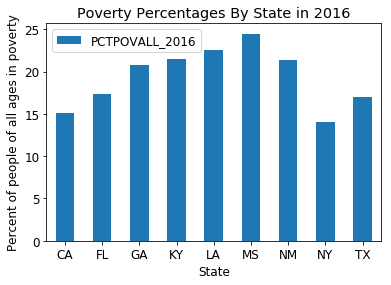

In [205]:
plt.rcParams.update({'font.size': 12})
#ax = sns.countplot(data=rents['Price_2018_10'], x=rents['State'], order=top_states)
top_states = ['CA', 'NY', 'TX', 'FL', 'MS', 'LA', 'KY', 'NM', 'GA']
ax = poverty.loc[poverty['State'].isin(top_states)].loc[:,['State', 'PCTPOVALL_2016']].groupby(["State"]).agg('mean').plot(kind="bar")
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_ylabel("Percent of people of all ages in poverty")
ax.set_title("Poverty Percentages By State in 2016");

## Population Dataset

We will first load the population data set, which was obtained from the USDA Economic Research Service, containing data from 2010-2017. We begin by cleaning the dataset and checking for repeated, missing, or unneeded values and information, and then explore and visualize the data to assist with feature engineering for our model.

In [214]:
population = pd.read_csv("data/populationByCounty.csv")
population.head()

,FIPS,State,Area_Name,Rural-urban_Continuum Code_2003,Rural-urban_Continuum Code_2013,Urban_Influence_Code_2003,Urban_Influence_Code_2013,Economic_typology_2015,CENSUS_2010_POP,ESTIMATES_BASE_2010,...,R_DOMESTIC_MIG_2015,R_DOMESTIC_MIG_2016,R_DOMESTIC_MIG_2017,R_NET_MIG_2011,R_NET_MIG_2012,R_NET_MIG_2013,R_NET_MIG_2014,R_NET_MIG_2015,R_NET_MIG_2016,R_NET_MIG_2017
0,0.0,US,United States,NaN,NaN,NaN,NaN,NaN,"308,745,538","308,758,105",...,0.0,0.0,0.0,2.7,2.9,2.9,3.2,3.5,3.5,3.4
1,1000.0,AL,Alabama,NaN,NaN,NaN,NaN,NaN,"4,779,736","4,780,135",...,-0.3,-0.4,0.8,0.5,0.9,1.4,0.7,0.7,0.6,1.7
2,1001.0,AL,Autauga County,2.0,2.0,2.0,2.0,0.0,"54,571","54,571",...,-2.0,4.8,1.0,5.9,-6.1,-4.1,2.1,-1.7,5.1,1.3
3,1003.0,AL,Baldwin County,4.0,3.0,5.0,2.0,5.0,"182,265","182,265",...,17.0,20.5,22.4,16.3,17.2,22.6,20.4,17.9,21.3,23.2
4,1005.0,AL,Barbour County,6.0,6.0,6.0,6.0,3.0,"27,457","27,457",...,-16.2,-18.8,-19.0,0.3,-6.8,-8.0,-5.5,-16.4,-18.9,-19.2


In [216]:
list(population.columns)

['FIPS',
 'State',
 'Area_Name',
 'Rural-urban_Continuum Code_2003',
 'Rural-urban_Continuum Code_2013',
 'Urban_Influence_Code_2003',
 'Urban_Influence_Code_2013',
 'Economic_typology_2015',
 'CENSUS_2010_POP',
 'ESTIMATES_BASE_2010',
 'POP_ESTIMATE_2010',
 'POP_ESTIMATE_2011',
 'POP_ESTIMATE_2012',
 'POP_ESTIMATE_2013',
 'POP_ESTIMATE_2014',
 'POP_ESTIMATE_2015',
 'POP_ESTIMATE_2016',
 'POP_ESTIMATE_2017',
 'N_POP_CHG_2010',
 'N_POP_CHG_2011',
 'N_POP_CHG_2012',
 'N_POP_CHG_2013',
 'N_POP_CHG_2014',
 'N_POP_CHG_2015',
 'N_POP_CHG_2016',
 'N_POP_CHG_2017',
 'Births_2010',
 'Births_2011',
 'Births_2012',
 'Births_2013',
 'Births_2014',
 'Births_2015',
 'Births_2016',
 'Births_2017',
 'Deaths_2010',
 'Deaths_2011',
 'Deaths_2012',
 'Deaths_2013',
 'Deaths_2014',
 'Deaths_2015',
 'Deaths_2016',
 'Deaths_2017',
 'NATURAL_INC_2010',
 'NATURAL_INC_2011',
 'NATURAL_INC_2012',
 'NATURAL_INC_2013',
 'NATURAL_INC_2014',
 'NATURAL_INC_2015',
 'NATURAL_INC_2016',
 'NATURAL_INC_2017',
 'INTERNATIO

## Cleaning the Population Dataset

Notice that we have columns containing extraneous information that will not be useful in building our model. We will not retain the information on births, deaths, international or domestic migration.

We must keep the State and County (Area_Name) columns for joining purposes, and choose to retain only the population count and change in population.

In [218]:
population = population.loc[:,['State','Area_Name',
                  'POP_ESTIMATE_2010',
                 'POP_ESTIMATE_2011',
                 'POP_ESTIMATE_2012',
                 'POP_ESTIMATE_2013',
                 'POP_ESTIMATE_2014',
                 'POP_ESTIMATE_2015',
                 'POP_ESTIMATE_2016',
                 'POP_ESTIMATE_2017',
                 'N_POP_CHG_2010',
                 'N_POP_CHG_2011',
                 'N_POP_CHG_2012',
                 'N_POP_CHG_2013',
                 'N_POP_CHG_2014',
                 'N_POP_CHG_2015',
                 'N_POP_CHG_2016',
                 'N_POP_CHG_2017',
                 'NET_MIG_2010',
                 'NET_MIG_2011',
                 'NET_MIG_2012',
                 'NET_MIG_2013',
                 'NET_MIG_2014',
                 'NET_MIG_2015',
                 'NET_MIG_2016',
                 'NET_MIG_2017']]

In [219]:
population.head()

,State,Area_Name,POP_ESTIMATE_2010,POP_ESTIMATE_2011,POP_ESTIMATE_2012,POP_ESTIMATE_2013,POP_ESTIMATE_2014,POP_ESTIMATE_2015,POP_ESTIMATE_2016,POP_ESTIMATE_2017,...,N_POP_CHG_2016,N_POP_CHG_2017,NET_MIG_2010,NET_MIG_2011,NET_MIG_2012,NET_MIG_2013,NET_MIG_2014,NET_MIG_2015,NET_MIG_2016,NET_MIG_2017
0,US,United States,"309,338,421","311,644,280","313,993,272","316,234,505","318,622,525","321,039,839","323,405,935","325,719,178",...,"2,366,096","2,313,243","191,171","844,816","913,547","908,676","1,007,273","1,124,764","1,132,096","1,111,283"
1,AL,Alabama,"4,785,579","4,798,649","4,813,946","4,827,660","4,840,037","4,850,858","4,860,545","4,874,747",...,"9,687","14,202","2,313","2,160","4,515","6,577","3,356","3,288","2,714","8,315"
2,AL,Autauga County,"54,750","55,199","54,927","54,695","54,864","54,838","55,278","55,504",...,440,226,172,325,-336,-222,115,-91,281,73
3,AL,Baldwin County,"183,110","186,534","190,048","194,736","199,064","202,863","207,509","212,628",...,"4,646","5,119",813,"3,010","3,238","4,351","4,013","3,598","4,374","4,866"
4,AL,Barbour County,"27,332","27,351","27,175","26,947","26,749","26,264","25,774","25,270",...,-490,-504,-69,7,-186,-217,-149,-435,-493,-489


## Unemployment Dataset

We will first load the unemployment data set, which was obtained from the Bureau of Labor Statistics, containing data from 2007-2017. We begin by cleaning the dataset and checking for repeated, missing, or unneeded values and information, and then explore and visualize the data to assist with feature engineering for our model.

In [224]:
unemployment = pd.read_csv("data/unemploymentByCounty.csv")
unemployment.head()

,FIPStxt,State,Area_name,Rural_urban_continuum_code_2013,Urban_influence_code_2013,Metro_2013,Civilian_labor_force_2007,Employed_2007,Unemployed_2007,Unemployment_rate_2007,...,Civilian_labor_force_2016,Employed_2016,Unemployed_2016,Unemployment_rate_2016,Civilian_labor_force_2017,Employed_2017,Unemployed_2017,Unemployment_rate_2017,Median_Household_Income_2016,Med_HH_Income_Percent_of_State_Total_2016
0,0,US,United States,NaN,NaN,NaN,"152,191,093","145,156,134","7,034,959",4.6,...,"158,921,892","151,183,680","7,738,212",4.9,"160,588,515","153,594,100","6,994,415",4.4,"$57,617",NaN
1,1000,AL,Alabama,NaN,NaN,NaN,"2,175,612","2,089,127","86,485",4.0,...,"2,173,175","2,045,624","127,551",5.9,2168444,2073106,95338,4.4,"$46,309",100.0
2,1001,AL,"Autauga County, AL",2.0,2.0,1.0,"24,383","23,577",806,3.3,...,"25,918","24,593","1,325",5.1,25909,24908,1001,3.9,"$54,487",117.7
3,1003,AL,"Baldwin County, AL",3.0,2.0,1.0,"82,659","80,099","2,560",3.1,...,"90,500","85,656","4,844",5.4,91567,87915,3652,4.0,"$56,460",121.9
4,1005,AL,"Barbour County, AL",6.0,6.0,0.0,"10,334","9,684",650,6.3,...,"8,402","7,700",702,8.4,8236,7750,486,5.9,"$32,884",71.0


In [225]:
unemployment.columns

Index(['FIPStxt', 'State', 'Area_name', 'Rural_urban_continuum_code_2013',
       'Urban_influence_code_2013', 'Metro_2013',
       ' Civilian_labor_force_2007 ', ' Employed_2007 ', ' Unemployed_2007 ',
       'Unemployment_rate_2007', ' Civilian_labor_force_2008 ',
       ' Employed_2008 ', ' Unemployed_2008 ', 'Unemployment_rate_2008',
       'Civilian_labor_force_2009', 'Employed_2009', 'Unemployed_2009',
       'Unemployment_rate_2009', ' Civilian_labor_force_2010 ',
       ' Employed_2010 ', ' Unemployed_2010 ', 'Unemployment_rate_2010',
       ' Civilian_labor_force_2011 ', ' Employed_2011 ', ' Unemployed_2011 ',
       'Unemployment_rate_2011', ' Civilian_labor_force_2012 ',
       ' Employed_2012 ', ' Unemployed_2012 ', 'Unemployment_rate_2012',
       ' Civilian_labor_force_2013 ', ' Employed_2013 ', ' Unemployed_2013 ',
       'Unemployment_rate_2013', ' Civilian_labor_force_2014 ',
       ' Employed_2014 ', ' Unemployed_2014 ', 'Unemployment_rate_2014',
       ' Civilian_lab

## Cleaning the Unemployment Dataset

Notice that we have columns containing extraneous information that will not be useful in building our model. We will not retain the information on births, deaths, international or domestic migration.

We must keep the State and County (Area_name) columns for joining purposes, and choose to retain the yearly unemployment rate from 2007-2017 and median household income for 2016.

In [227]:
unemployment.loc[:, ['State', 'Area_name', 'Unemployment_rate_2007', 'Unemployment_rate_2008', 
                     'Unemployment_rate_2009', 'Unemployment_rate_2010', 'Unemployment_rate_2011', 
                     'Unemployment_rate_2012', 'Unemployment_rate_2013', 'Unemployment_rate_2014', 
                     'Unemployment_rate_2015', 'Unemployment_rate_2016', 'Unemployment_rate_2017', 
                     'Median_Household_Income_2016']].head()

,State,Area_name,Unemployment_rate_2007,Unemployment_rate_2008,Unemployment_rate_2009,Unemployment_rate_2010,Unemployment_rate_2011,Unemployment_rate_2012,Unemployment_rate_2013,Unemployment_rate_2014,Unemployment_rate_2015,Unemployment_rate_2016,Unemployment_rate_2017,Median_Household_Income_2016
0,US,United States,4.6,5.8,9.3,9.6,9.0,8.1,7.4,6.2,5.3,4.9,4.4,"$57,617"
1,AL,Alabama,4.0,5.7,11.0,10.5,9.6,8.0,7.2,6.8,6.0,5.9,4.4,"$46,309"
2,AL,"Autauga County, AL",3.3,5.1,9.7,8.9,8.4,6.9,6.2,5.8,5.0,5.1,3.9,"$54,487"
3,AL,"Baldwin County, AL",3.1,4.6,9.8,10.0,9.0,7.5,6.6,6.1,6.0,5.4,4.0,"$56,460"
4,AL,"Barbour County, AL",6.3,8.8,14.3,12.3,11.5,11.5,10.2,10.5,9.0,8.4,5.9,"$32,884"


Notice that the county names (Area_name) have a comma and state abbreviation. 

We will have to clean those out in order to be able to merge properly with the sun roof data.

In [237]:
unemployment['County'] = unemployment.loc[:,['Area_name']].apply(lambda row : row['Area_name'].split(',')[0], axis=1)

In [238]:
unemployment.head()

,FIPStxt,State,Area_name,Rural_urban_continuum_code_2013,Urban_influence_code_2013,Metro_2013,Civilian_labor_force_2007,Employed_2007,Unemployed_2007,Unemployment_rate_2007,...,Employed_2016,Unemployed_2016,Unemployment_rate_2016,Civilian_labor_force_2017,Employed_2017,Unemployed_2017,Unemployment_rate_2017,Median_Household_Income_2016,Med_HH_Income_Percent_of_State_Total_2016,County
0,0,US,United States,NaN,NaN,NaN,"152,191,093","145,156,134","7,034,959",4.6,...,"151,183,680","7,738,212",4.9,"160,588,515","153,594,100","6,994,415",4.4,"$57,617",NaN,United States
1,1000,AL,Alabama,NaN,NaN,NaN,"2,175,612","2,089,127","86,485",4.0,...,"2,045,624","127,551",5.9,2168444,2073106,95338,4.4,"$46,309",100.0,Alabama
2,1001,AL,"Autauga County, AL",2.0,2.0,1.0,"24,383","23,577",806,3.3,...,"24,593","1,325",5.1,25909,24908,1001,3.9,"$54,487",117.7,Autauga County
3,1003,AL,"Baldwin County, AL",3.0,2.0,1.0,"82,659","80,099","2,560",3.1,...,"85,656","4,844",5.4,91567,87915,3652,4.0,"$56,460",121.9,Baldwin County
4,1005,AL,"Barbour County, AL",6.0,6.0,0.0,"10,334","9,684",650,6.3,...,"7,700",702,8.4,8236,7750,486,5.9,"$32,884",71.0,Barbour County


Also notice that the Median_Household_Income_2016 column has a dollar sign and commas, it is a dtype of object. 

We will convert into an int data type for ease of data processing later.

In [263]:
def convert_dollar_to_int(row):
    try:
        all_but_dollar_sign = str(row['Median_Household_Income_2016'])[1:]
        return int(all_but_dollar_sign.replace(',', ''))
    except:
        return ''

In [265]:
unemployment['Integer_med_household_income_2016'] = unemployment.apply(lambda row : convert_dollar_to_int(row) , axis=1)

In [269]:
unemployment['Median_Household_Income_2016'].isna().sum()

82

In [270]:
len(unemployment['Median_Household_Income_2016'])

3275

In [271]:
unemployment.tail()

,FIPStxt,State,Area_name,Rural_urban_continuum_code_2013,Urban_influence_code_2013,Metro_2013,Civilian_labor_force_2007,Employed_2007,Unemployed_2007,Unemployment_rate_2007,...,Unemployed_2016,Unemployment_rate_2016,Civilian_labor_force_2017,Employed_2017,Unemployed_2017,Unemployment_rate_2017,Median_Household_Income_2016,Med_HH_Income_Percent_of_State_Total_2016,County,int_med_household_income_2016
3270,72145,PR,"Vega Baja Municipio, PR",1.0,1.0,1.0,"21,115","18,445","2,670",12.6,...,"1,909",13.9,13467,11795,1672,12.4,NaN,NaN,Vega Baja Municipio,
3271,72147,PR,"Vieques Municipio, PR",7.0,12.0,0.0,"3,317","2,955",362,10.9,...,346,10.6,3228,2787,441,13.7,NaN,NaN,Vieques Municipio,
3272,72149,PR,"Villalba Municipio, PR",2.0,2.0,1.0,"9,479","8,223","1,256",13.3,...,"1,584",20.2,7631,6138,1493,19.6,NaN,NaN,Villalba Municipio,
3273,72151,PR,"Yabucoa Municipio, PR",1.0,1.0,1.0,"11,425","9,348","2,077",18.2,...,"1,540",16.9,9010,7533,1477,16.4,NaN,NaN,Yabucoa Municipio,
3274,72153,PR,"Yauco Municipio, PR",2.0,2.0,1.0,"16,635","14,451","2,184",13.1,...,"2,021",18.8,10276,8498,1778,17.3,NaN,NaN,Yauco Municipio,


## Joining the Datasets

We will join the sunroof datasets with all the external datasets that we have now cleaned.
We will merge on (state, county) pairs, as we have found that the county names are not unique.

In [206]:
sun_and_edu = pd.merge(sunroof, education,  how='left', \
                       left_on=['State','region_name'], right_on = ['State','Area name'])

In [208]:
sun_edu_pov = pd.merge(sun_and_edu, poverty, how='left', \
                       left_on=['State','region_name'], right_on=['State', 'Area_Name'])

In [221]:
sun_eda_pov_pop = pd.merge(sun_edu_pov, population, how='left', \
                       left_on=['State','region_name'], right_on=['State', 'Area_Name'])

In [272]:
sun_eda_pov_pop_unemp = pd.merge(sun_eda_pov_pop, unemployment, how='left', \
                       left_on=['State','region_name'], right_on=['State', 'County'])

In [274]:
sunroof.shape

(966, 26)

In [275]:
sun_eda_pov_pop_unemp.shape

(966, 116)

In [276]:
sun_eda_pov_pop_unemp.head(20)

,region_name,state_name,count_qualified,yearly_sunlight_kwh_kw_threshold_avg,percent_covered,percent_qualified,number_of_panels_n,number_of_panels_s,number_of_panels_e,number_of_panels_w,...,Unemployed_2016,Unemployment_rate_2016,Civilian_labor_force_2017,Employed_2017,Unemployed_2017,Unemployment_rate_2017,Median_Household_Income_2016,Med_HH_Income_Percent_of_State_Total_2016,County,int_med_household_income_2016
0,Acadia Parish,Louisiana,362,1087.15,1.295852,81.715576,3474,6970,4533,5398,...,"1,809",7.4,24151,22724,1427,5.9,"$40,218",88.6,Acadia Parish,40218
1,Ada County,Idaho,133939,1156.85,86.156364,90.224992,183489,2932039,1517496,2190037,...,"7,392",3.3,232954,226485,6469,2.8,"$61,571",119.2,Ada County,61571
2,Adams County,Colorado,117401,1246.10,92.906285,87.461913,58739,1859313,1050680,1205016,...,"9,056",3.6,261302,253318,7984,3.1,"$65,442",99.6,Adams County,65442
3,Adams County,Pennsylvania,4500,997.05,17.958957,87.006961,16651,70798,78169,68634,...,"2,199",4.0,55457,53419,2038,3.7,"$59,645",104.8,Adams County,59645
4,Aiken County,South Carolina,49051,1093.95,68.372367,86.296622,297265,984740,645255,693428,...,"3,691",5.0,74442,71386,3056,4.1,"$47,394",95.6,Aiken County,47394
5,Alachua County,Florida,42834,1108.40,77.907543,68.675046,349719,973293,610023,734622,...,"5,658",4.3,136013,130980,5033,3.7,"$45,294",89.1,Alachua County,45294
6,Alamance County,North Carolina,26057,1081.20,41.934685,80.942470,83130,437663,306755,345764,...,"3,738",4.7,79767,76334,3433,4.3,"$46,060",91.0,Alamance County,46060
7,Alameda County,California,372427,1229.10,96.583429,94.318029,2488057,5840749,4452530,5363907,...,"35,809",4.3,848335,817433,30902,3.6,"$89,472",132.1,Alameda County,89472
8,Albany County,New York,73594,961.35,90.320851,79.414272,112549,1127695,777304,629049,...,"6,465",4.1,159950,153134,6816,4.3,"$61,634",98.3,Albany County,61634
9,Albemarle County,Virginia,10992,1048.90,39.814769,68.002970,29802,185863,148753,130742,...,"1,948",3.6,55748,53905,1843,3.3,"$73,132",107.3,Albemarle County,73132


## Extra Datasets

Homelessness datasets, rents datasets, etc

In [279]:
rents = pd.read_csv("apartmentrent.csv")
rents.head()

,Location,Location_Type,State,Bedroom_Size,Price_2014_01,Price_2014_02,Price_2014_03,Price_2014_04,Price_2014_05,Price_2014_06,...,Price_2018_01,Price_2018_02,Price_2018_03,Price_2018_04,Price_2018_05,Price_2018_06,Price_2018_07,Price_2018_08,Price_2018_09,Price_2018_10
0,"New York, NY",City,NY,Studio,1780.0,1778.0,1781.0,1786.0,1794.0,1802.0,...,1863.0,1859.0,1861.0,1866.0,1883.0,1905.0,1899.0,1896.0,1895.0,1908
1,"New York, NY",City,NY,1br,1976.0,1975.0,1978.0,1983.0,1992.0,2001.0,...,2069.0,2065.0,2066.0,2073.0,2091.0,2115.0,2108.0,2106.0,2104.0,2119
2,"New York, NY",City,NY,2br,2354.0,2352.0,2356.0,2362.0,2373.0,2384.0,...,2465.0,2460.0,2462.0,2469.0,2491.0,2520.0,2512.0,2509.0,2506.0,2524
3,"New York, NY",City,NY,3br,3036.0,3033.0,3038.0,3046.0,3060.0,3074.0,...,3178.0,3172.0,3174.0,3183.0,3211.0,3249.0,3239.0,3235.0,3232.0,3255
4,"New York, NY",City,NY,4br,3381.0,3378.0,3383.0,3392.0,3407.0,3424.0,...,3540.0,3532.0,3535.0,3546.0,3577.0,3619.0,3607.0,3602.0,3599.0,3625


In [280]:
top_rents = rents.loc[rents['State'].isin(top_states)].loc[:,['State', 'Price_2018_10']].groupby(["State"]).agg('mean')

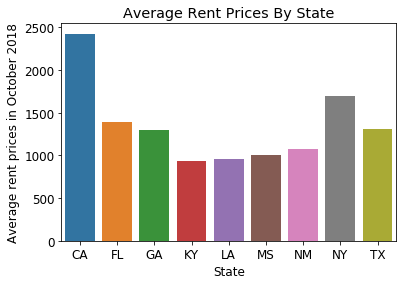

In [281]:
ax = sns.barplot(x="State", y="Price_2018_10", data=top_rents.reset_index())
ax.set_ylabel("Average rent prices in October 2018")
ax.set_title("Average Rent Prices By State");